# Visualizing a genome using ggplot

Here I am walking through the rather simple techniques I use for graphing chromosomes and displaying important information on top of them. I do this in R using just a few simple ggplot commands and it lets me make simple bar graphs to represent the chromsomes and lets me add some points to represent the locations of molecular markers and segments to highlight important regions of the genome as well.

First off an import the libraries we will be using.

In [1]:
library(tidyverse) #this is how I load ggplot2, you can also use library(ggplot2)
library(ggthemes)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Chromosome data - file structure

Here I import a csv file containing the data needed for building the chromosome plot. I am working with the Arctic charr genome (organism of study for my PhD) but this can be substituted for any genome of your choosing. All you need is two columns: one with the name of each chromosome and one with the base pair length of each chromosome. If you have a genome you want to plot but don't have this information then you can obtain it from [NCBI](https://www.ncbi.nlm.nih.gov/genome). For example [on this page I searched for the platypus genome](https://www.ncbi.nlm.nih.gov/assembly/GCA_000002275.2). You can see at the bottom of the page there is an 'Assembly statistics' tab. Downloading that data and saving it as a .csv will give you all the info you need to plot the chromosomes.

In [2]:
chr_dat = read_csv('data/chromosome_dat_example.csv') #this is the tidyverse version of read.csv I personally have started using it because I 
                    #find it does a better job of identifying and parsing columns with factors, numbers etc. than the base function

Parsed with column specification:
cols(
  chr_name = col_character(),
  chr_len = col_integer()
)


Here is the Arctic charr genome information. The chr_dat column has the names of all the chromosomes, and they are stored as factors.

In [3]:
head(chr_dat)

chr_name,chr_len
AC01,58017395
AC02,43538721
AC03,36001405
AC04p,28292882
AC04q.1:29,90519428
AC04q.2,29595583


## Plotting the chromosomes

Below I build a variable named genome_base that stores the plot. Using geom_bar, we draw the lines for each of the chromosomes at their respective points along the x axis (x = chr_name) and the height of the bars is designated by the length of the chromsomes (y = chr_len).

The other options are purely aesthetic, altering the width of the bars, changing the colour to grey, adding titles and then using ggthemes to alter the ggplot default aesthetics. The final command turns the labels 90 degrees so that the chromosome names do not overlap. All of the options can be tinkered with to alter how the plot's looks to fit your needs.

In [4]:
genome_base = ggplot(NULL) +
    geom_bar(data = chr_dat, 
            aes(x = chr_name, y = chr_len) , 
            stat='identity', 
            fill='grey80', 
            colour='grey80', 
            width=.2) +
    labs(y = "Base pair position", 
            x = "Arctic charr chromosome") +
    theme_minimal() +
    theme_light() +
    theme(panel.border = element_blank(),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank()) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.ticks.x = element_blank())


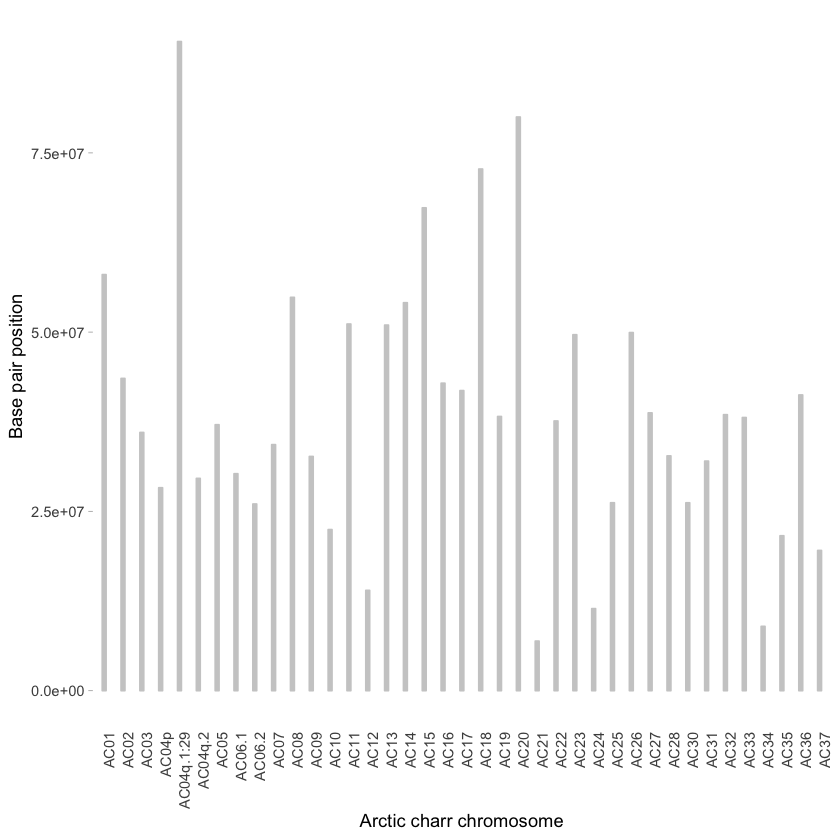

In [5]:
genome_base

## Adding information on top of the chromosomes 

With the background chromosmes built, we can use a few simple lines of code to highlight regions of interest in the genome. Here I inport a .csv file with some segments I want to display in a different colour.

In [6]:
important_segments = read_csv('data/seg_locations_example.csv')

Parsed with column specification:
cols(
  chr_name = col_character(),
  mb_start = col_integer(),
  mb_end = col_integer()
)


The segment data has three columns. One is the name of the chromosome that the segment belongs on (corresponding to the factors of the genome_base background plot and the other two columns are the start and stop positions of the regions I want to highlight.

In [7]:
head(important_segments)

chr_name,mb_start,mb_end
AC04q.1:29,26000000,26999999
AC04q.1:29,27000000,27999999
AC04q.1:29,33000000,33999999
AC04q.2,16000000,16999999
AC06.1,27000000,27999999
AC07,8000000,8999999


All that is needed to plot them on top of the background is to call the initial plot variable and add a series of segments to the graph using geom_segment. Note the y and yend positions are the start and stop positions from the dataframe, while both x postions are the chromosome the segment belongs on.

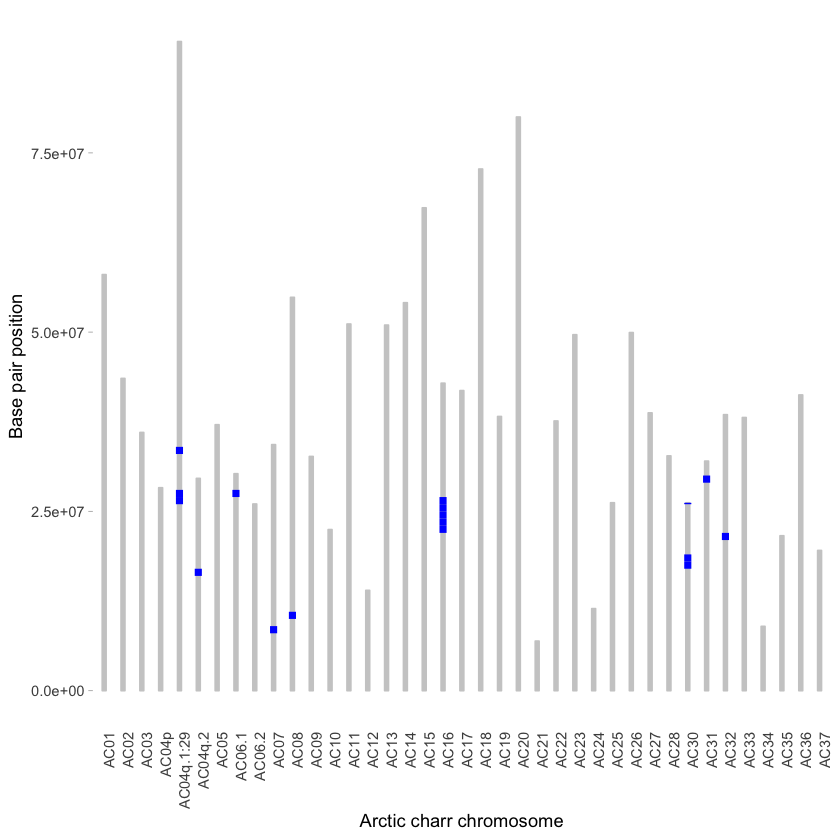

In [8]:
seg_example = genome_base + 
    geom_segment(data = important_segments, 
        aes(x=chr_name, xend=chr_name, y=mb_start, yend=mb_end), 
        color='blue', 
        size = 2)

seg_example

Visualizing points is even easier then segments. Instead of a start and stop position all we need is the location of the particular marker or thing we are interested in (here I have SNP marker positions). Then using geom_point we are able to add the points on top of the chromosomes and display their positons in the genome.

In [9]:
points_example = read_csv('data/snp_locations_example.csv')

Parsed with column specification:
cols(
  SNP_ID = col_integer(),
  chr_name = col_character(),
  POS = col_integer()
)


In [10]:
head(points_example)

SNP_ID,chr_name,POS
1,AC01,49371130
2,AC01,31726846
3,AC01,28413693
4,AC01,28382714
5,AC01,6106981
6,AC01,33305721


Note here I have a lot of points I am showing so I have included a position_jitter command to move them a little bit left or right at random so that they do not overlap too much.

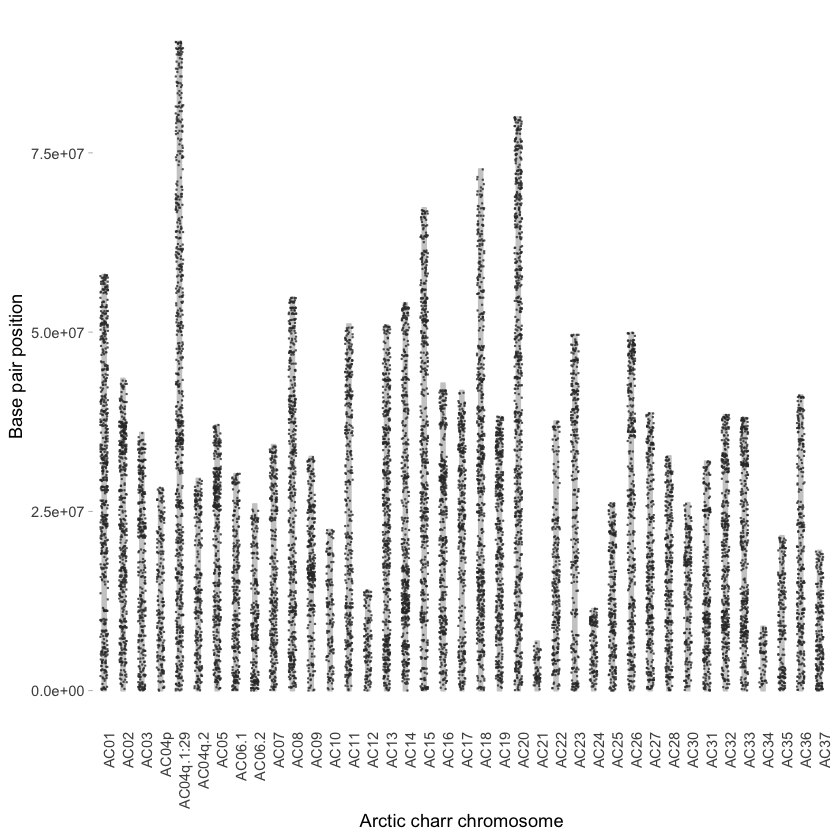

In [11]:
marker_locations = genome_base + 
    geom_point(data = points_example, 
        aes(x=chr_name, y=POS), 
        color="grey20",
        shape=22,
        size=.001,
        alpha = 0.8, 
        position=position_jitter(.2))

marker_locations

These techniques can be mixed and matched as well. Using a combination of the segments and points we can build some more complex visuals. This could be extended to include multiple sets of points or segments in different colours or sizes.

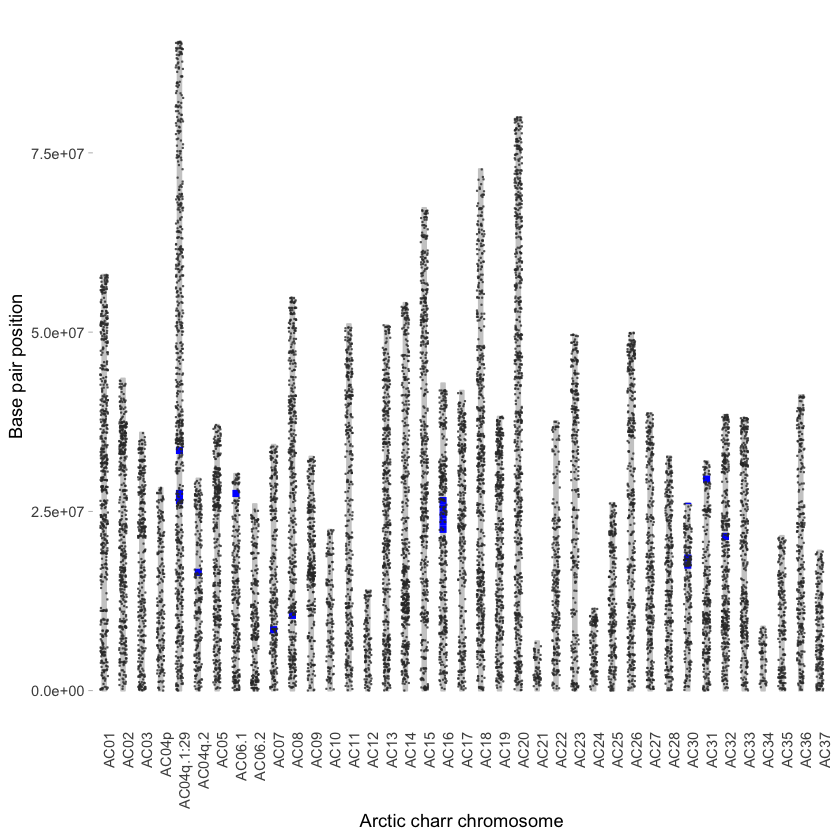

In [12]:
ensemble =  genome_base +
    geom_segment(data = important_segments, 
        aes(x=chr_name, xend=chr_name, y=mb_start, yend=mb_end), 
        color='blue', 
        size = 2) + 
    geom_point(data = points_example, 
        aes(x=chr_name, y=POS), 
        color="grey20",
        shape=22,
        size=.001,
        alpha = 0.8, 
        position=position_jitter(.2))

ensemble

As we can see, representing information about chromosomes is a relatively simple task in R. The right combination of bar plots, points and segments can be used to visualize mostly anything one would want to highlight in a genome. The code can be reused in a cookbook style fashion!